# A notebook for playing with results of our model
You do need gpu to run this model.

### Imports

In [10]:
import torch
from timm import create_model
from modules import models
import os
import torchvision.transforms.transforms as transforms
import cv2 as cv
import matplotlib.pyplot as plt


### key variables

In [11]:
# model name
model = 'ResNet56PaddingSeLu'

# path to weights of model 
weight_path = 'logs_and_weights/ResNet56PaddingSeLu/epoch19.pt'

# root dir to image folder, important for getting classes as well
image_root = 'image_data/tiny/test'
classes = os.listdir(image_root)

# test image
image_path = 'image_data/tiny/test/banana/n07753592_259.JPEG'

# create model and load weights
model = create_model(model).to("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(weight_path))


<All keys matched successfully>

### image preprocessing function

In [12]:
def preprocess(img):
    # min-max normalize and transfer to tensor
    img = transforms.ToTensor()(img)

    # type cast to float and transfer to batch format (network only takes in form of batches)
    img = img.float().view(-1, 3, 64, 64)
    return img


### Read, feed and get output

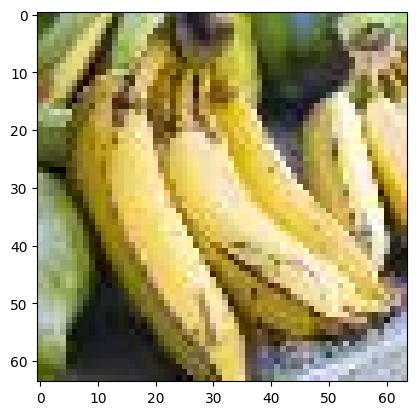

In [13]:
# read image
img = cv.imread(image_path)

# preprocess and put tensor on right device
img_t = preprocess(img).to("cuda" if torch.cuda.is_available() else "cpu")

output = model(img_t)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### Analyze output

In [14]:
output_argmax = torch.argmax(output, dim=1).item()
print('strongest index:', output_argmax)

print('Value of strongest index:', output[0, output_argmax].item())

pred_class = classes[output_argmax]
print('predicted class:', pred_class)



strongest index: 79
Value of strongest index: 0.049664199352264404
predicted class: broom
